In [1]:
import sys
sys.path.insert(0, '..')

import os
import requests

In [2]:
from biosimulator_processes.tests.test_copasi_process import test_process_from_document
from biosimulator_processes.tests.data_model import ProcessUnitTest
from biosimulator_processes import CORE
from process_bigraph import Composite, pp

CobraProcess registered successfully.
CopasiProcess registered successfully.
SmoldynProcess registered successfully.
TelluriumProcess registered successfully.


#### Step 1: Define the document to be read by the Composite, which is implemented by the Process

In [3]:
biomodel_id = 'BIOMD0000000630'

"""document = {
    'copasi': {
        '_type': 'process',
        'address': 'local:copasi',
        'config': {
            'model': {
                'model_source': biomodel_id  
            },
            'method': 'lsoda'
        },
        'inputs': {
            'floating_species': ['floating_species_store'],
            'model_parameters': ['model_parameters_store'],
            'time': ['time_store'],
            'reactions': ['reactions_store']
        },
        'outputs': {
            'floating_species': ['floating_species_store'],
            'time': ['time_store'],
        }
    },
    'emitter': {
        '_type': 'step',
        'address': 'local:ram-emitter',
        'config': {
            'emit': {
                'floating_species': 'tree[float]',
                'time': 'float',
            },
        },
        'inputs': {
            'floating_species': ['floating_species_store'],
            'time': ['time_store'],
        }
    }
}"""

document = {
    'copasi': {
        '_type': 'process',
        'address': 'local:copasi',
        'config': {
            'model': {
                'model_source': biomodel_id  
            },
            'method': 'lsoda'
        },
        'inputs': {
            'floating_species_concentrations': ['floating_species_concentrations_store'],
            'floating_species_counts': ['floating_species_counts_store'],
            'model_parameters': ['model_parameters_store'],
            'time': ['time_store'],
            'reactions': ['reactions_store']
        },
        'outputs': {
            'floating_species_concentrations': ['floating_species_concentrations_store'],
            'floating_species_counts': ['floating_species_counts_store'],
            'time': ['time_store'],
        }
    },
    'emitter': {
        '_type': 'step',
        'address': 'local:ram-emitter',
        'config': {
            'emit': {
                'floating_species_concentrations': 'tree[float]',
                'floating_species_counts': 'tree[float]',
                'time': 'float',
            },
        },
        'inputs': {
            'floating_species_concentrations': ['floating_species_concentrations_store'],
            'floating_species_counts': ['floating_species_counts_store'],
            'time': ['time_store'],
        }
    }
}

#### Step 2: Define the instance composition along with the process registry

In [4]:
workflow = Composite(
    config={'state': document},
    core=CORE
)

found a biomodel id


#### Step 3: Run the workflow for a duration and get the results

In [5]:
workflow.run(30)

results = workflow.gather_results()


Outputs at 0.0:
{'time': 1.0, 'floating_species_concentrations': {'plasminogen': 0.009841338438766237, 'plasmin': 3.500808587045718e-07, 'single intact chain urokinase-type plasminogen activator': 0.0030692854818269847, 'two-chain urokinase-type plasminogen activator': 2.1839175650943385e-15, 'x': 0.0, 'x-plasmin': 0.0}, 'floating_species_counts': {'plasminogen': 5926592534504892.0, 'plasmin': 210823620850.06027, 'single intact chain urokinase-type plasminogen activator': 1848366920418652.5, 'two-chain urokinase-type plasminogen activator': 1315.185898523457, 'x': 0.0, 'x-plasmin': 0.0}}


Outputs at 1.0:
{'time': 1.0, 'floating_species_concentrations': {'plasminogen': 0.019370741215749214, 'plasmin': 2.6272428605330354e-06, 'single intact chain urokinase-type plasminogen activator': 0.005891282487548538, 'two-chain urokinase-type plasminogen activator': 4.146729150732806e-13, 'x': 0.0, 'x-plasmin': 0.0}, 'floating_species_counts': {'plasminogen': 1.166533302267753e+16, 'plasmin': 158

/Users/alex/Desktop/uchc_work/repos/biosimulator-processes/notebooks/../biosimulator_processes/processes/copasi_process.py:332: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Users/alex/Desktop/uchc_work/repos/biosimulator-processes/notebooks/../biosimulator_processes/processes/copasi_process.py:341: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`




Outputs at 24.0:
{'time': 1.0, 'floating_species_concentrations': {'plasminogen': 5.788647970947049e-07, 'plasmin': 75470.72640123221, 'single intact chain urokinase-type plasminogen activator': 1.4045362715928928e-14, 'two-chain urokinase-type plasminogen activator': 19194.528242695615, 'x': 0.0, 'x-plasmin': 0.0}, 'floating_species_counts': {'plasminogen': 348600528911.3152, 'plasmin': 4.544953376476686e+22, 'single intact chain urokinase-type plasminogen activator': 8458.31513005799, 'two-chain urokinase-type plasminogen activator': 1.1559215089930843e+22, 'x': 0.0, 'x-plasmin': 0.0}}


Outputs at 25.0:
{'time': 1.0, 'floating_species_concentrations': {'plasminogen': 3.015827484908975e-07, 'plasmin': 144860.70462597968, 'single intact chain urokinase-type plasminogen activator': 3.8123137906237065e-15, 'two-chain urokinase-type plasminogen activator': 36842.53509863519, 'x': 0.0, 'x-plasmin': 0.0}, 'floating_species_counts': {'plasminogen': 181617376219.98624, 'plasmin': 8.72371553

In [6]:
pp(results)

{ ('emitter',): [ { 'floating_species_concentrations': { 'plasmin': 0.0,
                                                         'plasminogen': 0.0,
                                                         'single intact chain urokinase-type plasminogen activator': 0.0,
                                                         'two-chain urokinase-type plasminogen activator': 0.0,
                                                         'x': 0.0,
                                                         'x-plasmin': 0.0},
                    'floating_species_counts': { 'plasmin': 0.0,
                                                 'plasminogen': 0.0,
                                                 'single intact chain urokinase-type plasminogen activator': 0.0,
                                                 'two-chain urokinase-type plasminogen activator': 0.0,
                                                 'x': 0.0,
                                                 'x-plasmin': 

In [7]:
from biosimulator_processes.steps.viz import ResultsAnimation

In [8]:
output = results.copy()

In [9]:
output_vals = output[('emitter',)]

In [10]:
timescale = list(set([val.get('time', 0.0) for val in output_vals]))

In [11]:
timescale

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0]

In [12]:
data = []
counts_data = []

In [13]:
for i, val in enumerate(output_vals):
    species_data = val.get('floating_species_concentrations')
    data.append(species_data.get('plasminogen'))
    counts = val.get('floating_species_counts')
    counts_data.append(counts.get('plasminogen'))

In [14]:
data, counts_data

([0.0,
  0.009841338438766237,
  0.02921207965451545,
  0.0673340084602464,
  0.14233758795777518,
  0.2898254125579512,
  0.5795486179831393,
  1.1475441940270583,
  2.2562471891541533,
  4.357941523046428,
  6.275671452231845,
  7.1440128829007,
  7.3089267858318,
  7.315609006689118,
  7.316363679960139,
  7.316754824880197,
  7.316959047589873,
  7.317065565558107,
  7.317121093012439,
  7.317150031024135,
  7.317165109820492,
  7.317172966350888,
  7.317177059685848,
  7.3171791923126115,
  7.317180303397827,
  7.317180882262624,
  7.317181183845372,
  7.317181340966627,
  7.317181422824921,
  7.317181465472144,
  7.317181487690843],
 [0.0,
  5926592534504892.0,
  1.7591925557182422e+16,
  4.0549487688263464e+16,
  8.571769901206029e+16,
  1.7453694302490534e+17,
  3.4901233547579315e+17,
  6.910672664751697e+17,
  1.3587438162440658e+18,
  2.624413727563437e+18,
  3.7792976848853786e+18,
  4.302225117208142e+18,
  4.401538590881348e+18,
  4.4055627183405655e+18,
  4.4060171932071

In [15]:
len(timescale), len(data)

(31, 31)

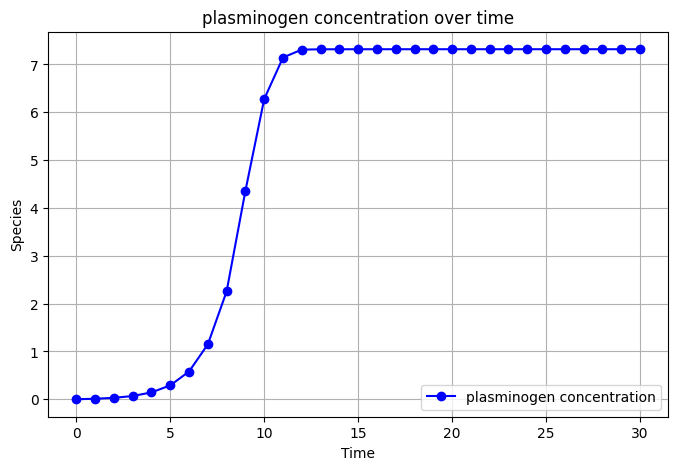

In [16]:
ResultsAnimation.plot_single_output(timescale=timescale, concentrations=data, species_name='plasminogen concentration')

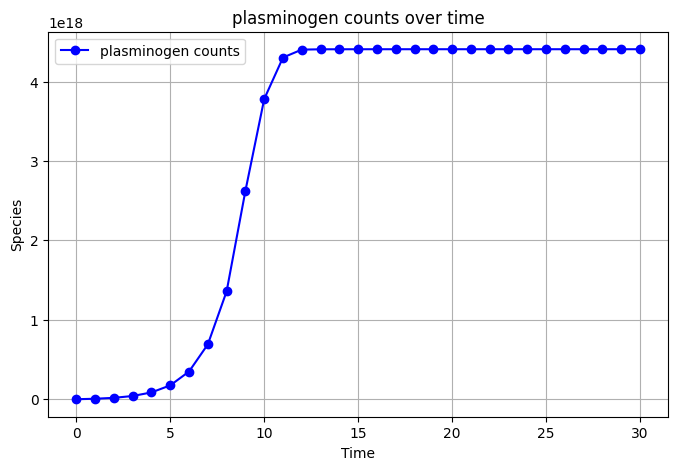

In [17]:
ResultsAnimation.plot_single_output(timescale=timescale, concentrations=counts_data, species_name='plasminogen counts')

In [4]:
from basico import * 
from biosimulator_processes.utils import fetch_biomodel


model = fetch_biomodel(biomodel_id)

In [7]:
get_species(model=model).particle_number

name
plasminogen                                                 6.022141e+15
plasmin                                                     0.000000e+00
single intact chain urokinase-type plasminogen activator    1.204428e+15
two-chain urokinase-type plasminogen activator              0.000000e+00
x                                                           0.000000e+00
x-plasmin                                                   0.000000e+00
Name: particle_number, dtype: float64

In [10]:
set_species('plasminogen', model=model, initial_concentration=5.032)

In [8]:
set_species('plasminogen', model=model, particle_number=5.032)

In [9]:
get_species(model=model).particle_number

name
plasminogen                                                 5.032000e+00
plasmin                                                     0.000000e+00
single intact chain urokinase-type plasminogen activator    1.204428e+15
two-chain urokinase-type plasminogen activator              0.000000e+00
x                                                           0.000000e+00
x-plasmin                                                   0.000000e+00
Name: particle_number, dtype: float64

In [11]:
get_species(model=model).initial_concentration

name
plasminogen                                                 5.032
plasmin                                                     0.000
single intact chain urokinase-type plasminogen activator    0.002
two-chain urokinase-type plasminogen activator              0.000
x                                                           0.000
x-plasmin                                                   0.000
Name: initial_concentration, dtype: float64